# Earthquake dataset 

    - understand sig, net, nst and dmin
    - fill in country with location
    - check for outliers
    - visualize as map with circles with size according to magnitude 
    

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset

In [2]:
quakes = pd.read_csv('data/earthquake_data.csv')
quakes.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


Some nan's are already present in the first five rows, but some can be filled later instead of dropping by taking it from the location column:

In [4]:
print(f"Rows: {quakes.shape[0]} | Features: {quakes.shape[1]}")
print(quakes.isna().sum())

Rows: 782 | Features: 19
title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64


## Descriptive statistics

In [6]:
quakes.describe().T

,count,mean,std,min,25%,50%,75%,max
magnitude,782.0,6.941125,0.445514,6.5000,6.60000,6.8000,7.1000,9.1000
cdi,782.0,4.333760,3.169939,0.0000,0.00000,5.0000,7.0000,9.0000
mmi,782.0,5.964194,1.462724,1.0000,5.00000,6.0000,7.0000,9.0000
tsunami,782.0,0.388747,0.487778,0.0000,0.00000,0.0000,1.0000,1.0000
sig,782.0,870.108696,322.465367,650.0000,691.00000,754.0000,909.7500,2910.0000
nst,782.0,230.250639,250.188177,0.0000,0.00000,140.0000,445.0000,934.0000
dmin,782.0,1.325757,2.218805,0.0000,0.00000,0.0000,1.8630,17.6540
gap,782.0,25.038990,24.225067,0.0000,14.62500,20.0000,30.0000,239.0000
depth,782.0,75.883199,137.277078,2.7000,14.00000,26.2950,49.7500,670.8100
latitude,782.0,3.538100,27.303429,-61.8484,-14.59560,-2.5725,24.6545,71.6312


## Dtypes

In [11]:
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

## Memory Usage

In [13]:
quakes.memory_usage(deep=True).sum()

467774

Lets transform float64 features as float16:

In [52]:
float64_cols = ['magnitude', 'dmin', 'gap', 'depth', 'latitude', 'longitude']
quakes[float64_cols] = quakes[float64_cols].astype(np.float16)

In [53]:
quakes.memory_usage(deep=True).sum()

388792

Same for int64 featues:

In [56]:
int64_cols = ['cdi', 'mmi', 'tsunami', 'sig', 'nst']
quakes[int64_cols] = quakes[int64_cols].astype(np.int16)

In [57]:
quakes.memory_usage(deep=True).sum()

365332

Now let's transform object type columns into categories:

In [61]:
object_cols = list(quakes.select_dtypes('object').columns)
quakes[object_cols] = quakes[object_cols].astype('category')

In [62]:
quakes.memory_usage(deep=True).sum()

180712

Decrease in memory usage expressed in percentage:

In [70]:
start_mem = 467774
end_mem = 180712
pct_decrease = (start_mem - end_mem) / start_mem

print(f"Memory percentage decrease: {round(pct_decrease, 3)*100}%")

Memory percentage decrease: 61.4%


## Transform date_time column to datetime64 format

In [14]:
quakes['date_time'] = pd.to_datetime(quakes['date_time'])

In [21]:
quakes[pd.isnull(quakes).any(axis=1)].head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,2022-11-18 13:37:00,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,2022-12-11 07:09:00,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,2022-11-11 10:48:00,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,2022-09-11 10:14:00,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
5,M 7.0 - south of the Fiji Islands,7.0,2022-09-11 09:51:00,4,3,green,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.381,the Fiji Islands,NaN,NaN


If we want to fill this datapoint instead of dropping we can look for 6.6 magnitude earthquake data from 2022-09-11 10:14:00.

## EDA

/var/folders/l6/bs_245f50mv9cxj2n2ptrxdh0000gn/T/ipykernel_57728/2595497917.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(quakes.corr(), annot=True)


<Axes: title={'center': 'Correlation between numerical features'}>

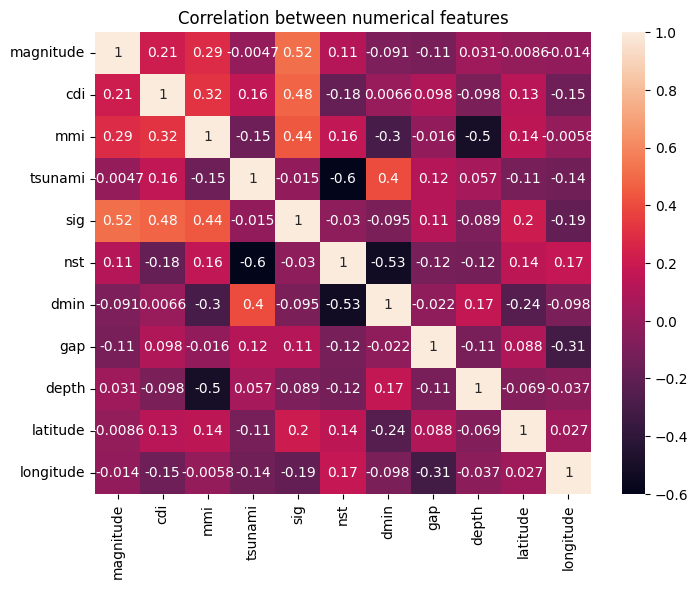

In [27]:
plt.figure(figsize=(8,6))
plt.title("Correlation between numerical features")
sns.heatmap(quakes.corr(), annot=True)

### Boxplots

Text(0.5, 0, 'Magnitude')

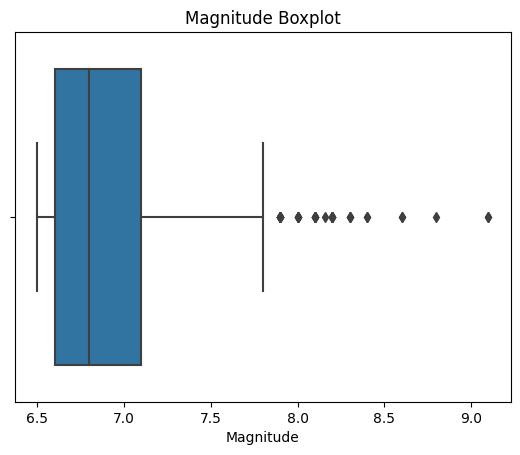

In [40]:
plt.title("Magnitude Boxplot")
sns.boxplot(data=quakes, x='magnitude')
plt.xlabel("Magnitude")

In [48]:
quakes[(quakes['magnitude'] >= 7.8) & (quakes['tsunami'] == 0)].head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
56,M 8.1 - South Sandwich Islands region,8.1,2021-12-08 18:35:00,0,7,green,0,1009,us,0,7.463,78.0,mww,22.79,-58.4157,-25.3206,South Sandwich Islands region,NaN,NaN
257,"M 7.8 - southwest of Sumatra, Indonesia",7.8,2016-02-03 12:49:00,4,3,green,0,948,us,0,7.009,20.0,mww,24.00,-4.9521,94.3299,"Sumatra, Indonesia",NaN,NaN
308,"M 7.8 - 67 km NNE of Bharatpur, Nepal",7.8,2015-04-25 06:11:00,8,9,red,0,2820,us,0,1.857,12.0,mww,8.22,28.2305,84.7314,"Bharatpur, Nepal",Asia,Nepal
424,"M 7.8 - 206 km SW of Prince Rupert, Canada",7.8,2012-10-28 03:04:00,8,7,NaN,0,1726,us,807,0.000,42.7,mww,14.00,52.7880,-132.1010,"Prince Rupert, Canada",North America,Canada
440,M 8.2 - off the west coast of northern Sumatra,8.2,2012-11-04 10:43:00,9,6,green,0,1213,us,341,0.000,14.9,mwc,25.10,0.8020,92.4630,off the west coast of northern Sumatra,NaN,NaN


Text(0, 0.5, 'Magnitude')

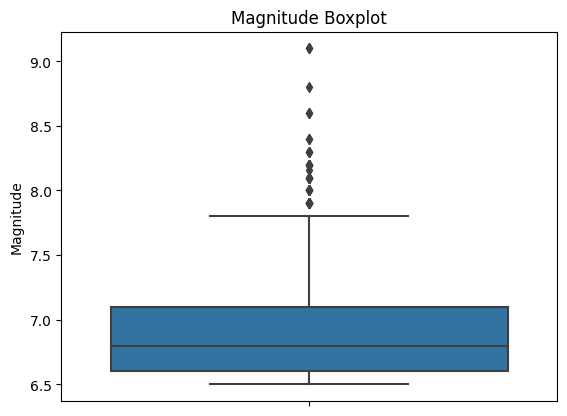

In [38]:
plt.title("Magnitude Boxplot")
sns.boxplot(data=quakes, y='magnitude', hue='alert')
plt.ylabel("Magnitude")

In [34]:
quakes.tsunami.value_counts()

0    478
1    304
Name: tsunami, dtype: int64